In [1]:
import sys
import os

sys.path.append(os.path.abspath('../../'))

In [2]:
import networkx as nx
import math

from Classes.BiasedInfluenceGraph import *
from Classes.WordGenerator import *

## Update function changing over time (Dynamic bias function)

## Simulation restricted to functions in R

In [3]:
def conf(G, e):
    delta = 0.01
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x*(1 + delta - abs(x))/(1+delta)

def wave(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if x >= -1 and x < -0.02:
        return (math.sin(25*x )*x + x)/2 * 0.9 - 0.01
    elif x >= -0.02 and x <= 0.02:
        return x*0.734259
    elif x <= 1 and x > 0.02:
        return (math.sin(25*x + math.pi)*x + x)/2 * 0.9 + 0.01  

In [4]:
def random_lin(G, e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    scale_factor = random.uniform(0.0001, 1)
    return scale_factor * x

def set_random_bias_function(G, e):
    return random.choice([conf, wave, random_lin])(G,e)

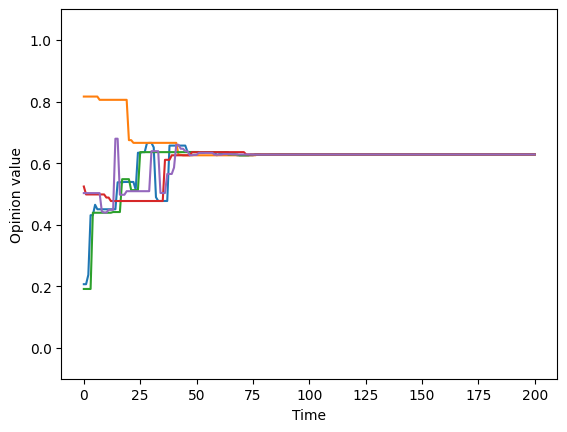

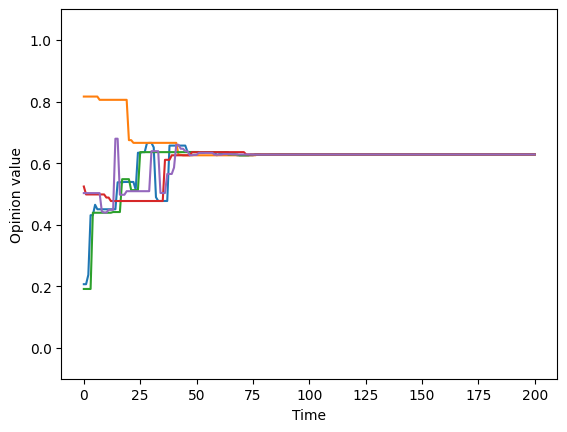

In [ ]:
n = 5
p = 0.4
B0 = []

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=set_random_bias_function)

word_len = 40*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

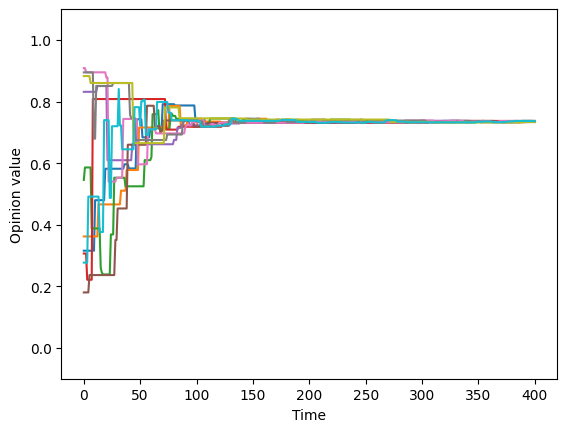

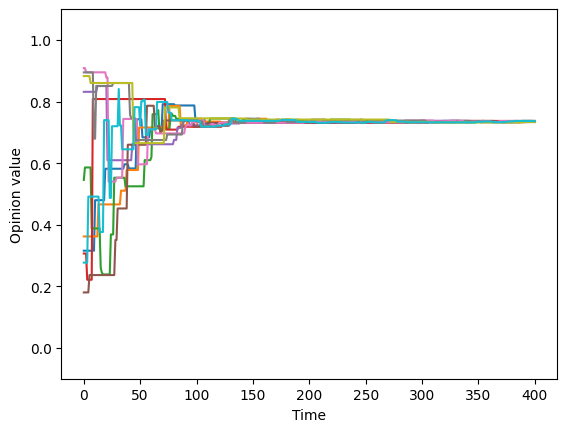

In [9]:
n = 10
p = 0.4
B0 = []

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=set_random_bias_function)

word_len = 40*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

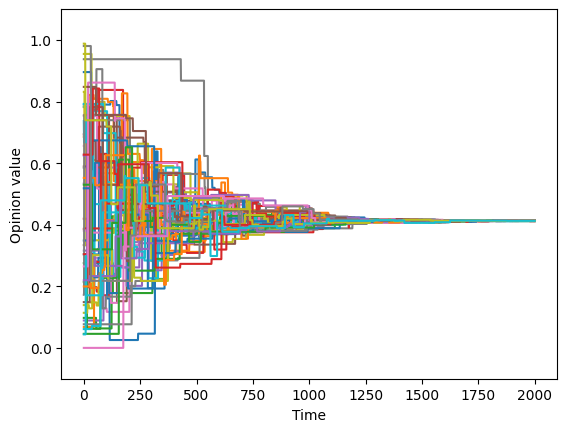

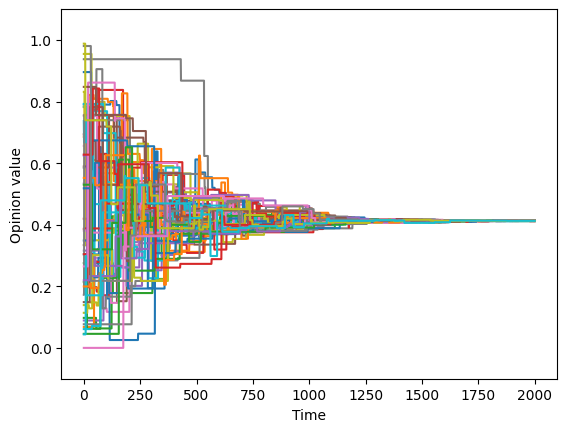

In [8]:
n = 50
p = 0.4
B0 = []

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=set_random_bias_function)

word_len = 40*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

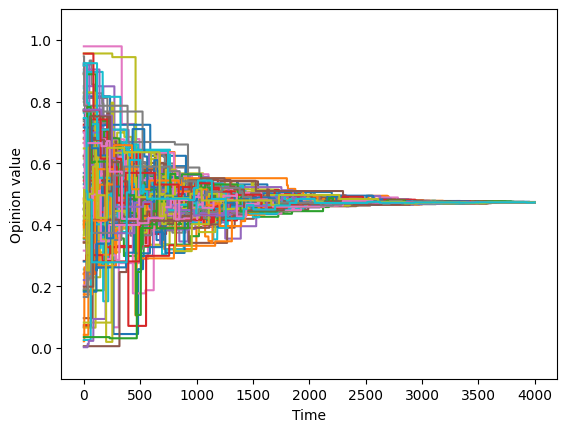

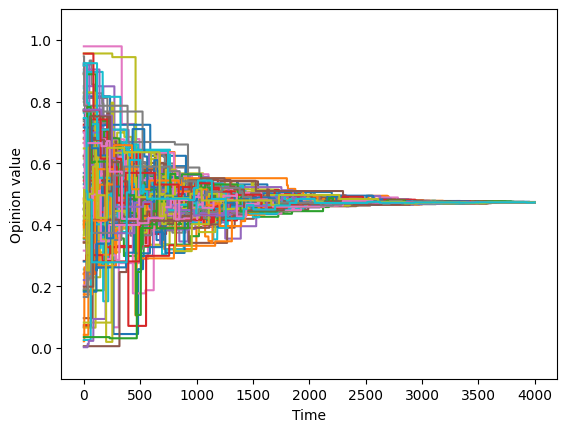

In [10]:
n = 100
p = 0.4
B0 = []

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 1,bias_fn=set_random_bias_function)

word_len = 40*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

## Including bias functions in other regions

In [86]:
def backf(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return -(x ** 3)

def fan(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 0 if x == 0 else x/abs(x)

def ins(G,e):
    return 0

def lin(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return random.uniform(0.1, 3) * x

In [ ]:
influence_values = {}

def get_unique_random_influence_for_pair(e):
    if e not in influence_values:
        influence_values[e] = random.uniform(0, 1)
    return influence_values[e]

def random_inf(G, e):
    return get_unique_random_influence_for_pair(e)

def set_random_bias_function(G, e):
    return random.choice([conf, backf, fan, ins, lin])(G,e)

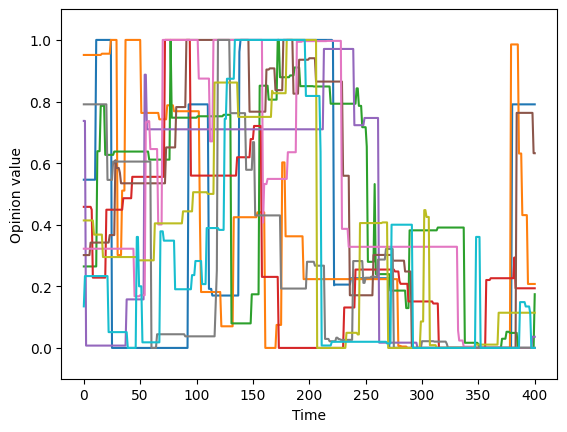

In [ ]:
n = 10
p = 0.4
B0 = []

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf,bias_fn=set_random_bias_function)

word_len = 40*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()